In [ ]:
import pandas as pd
import io
from google.colab import files
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import copy
from sklearn import datasets

# Upload Dataset

In [ ]:
# Check if Churn_Modelling1.csv is already uploaded, if so, no need to run this cell
# skip to the next cell
# this cell just loads the file into the folders on the left hand side
uploaded = files.upload()

Saving Churn_Modelling1.csv to Churn_Modelling1.csv


In [ ]:
# loads the csv into a pandas dataframe, so we can clean it and transform it using pandas functions
df = pd.read_csv('Churn_Modelling1.csv')

In [ ]:
# check to see the df is loaded properly
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# Data Exploration

In [ ]:
# lets look at the columns of the dataframe
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
# just look athe number of rows and columns
print(df.shape)

(10000, 14)


In [ ]:
# check the data type of each column
print(df.dtypes)

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object


In [ ]:
# look at basic stats like count, mean, deviations, quartiles, max, min of each column
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
# check if there's missing values
columns_with_missing_values = df.columns[df.isnull().any()]
columns_with_missing_values

Index([], dtype='object')

In [ ]:
# check the percentage of missing values in each column
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

RowNumber          0.0
CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

# Data Cleaning

In [ ]:
# Drop columns that don't affect the target column
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [ ]:
# look if the columns have been dropped
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [ ]:
# create a variable for categorical features
categorical_features = ['Geography', 'Gender']

In [ ]:
# encode the categorical features using the variable above
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


# Train, Test, Split



In [ ]:
# Split into train/test:
train, test = train_test_split(df, test_size=0.2, random_state=22)

# Scale features

In [ ]:
# upload Scaler
from sklearn.preprocessing import StandardScaler

In [ ]:
# create scaler object
scale= StandardScaler()

In [ ]:
# create a variable for numerical features(features are aka columns)
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

In [ ]:
# create a variable for categorical features
categorical_features_encoded = ['Geography_Germany', 'Geography_Spain', 'Gender_Male']

In [ ]:
# create a variable for binary features (columns with 0 an 1)
binary_features = ['HasCrCard', 'IsActiveMember']

In [ ]:
# add up all the features into a list
all_features = numerical_features + categorical_features_encoded + binary_features
all_features

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'EstimatedSalary',
 'Geography_Germany',
 'Geography_Spain',
 'Gender_Male',
 'HasCrCard',
 'IsActiveMember']

In [ ]:
# check the status of data frames with these features
# Exited is still in the train dataframe but won't show here because we've only printed the columns in all_features
train[all_features]

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,HasCrCard,IsActiveMember
3821,608,56,5,0.00,2,153810.41,False,True,False,0,1
6136,780,33,6,145580.61,1,154598.56,False,True,False,1,1
8161,588,31,4,99607.37,2,35877.03,False,False,True,0,1
655,498,25,8,121702.73,1,132210.49,True,False,True,1,1
2950,734,37,0,152760.24,1,48990.50,False,True,False,1,1
...,...,...,...,...,...,...,...,...,...,...,...
4587,500,34,6,0.00,1,140268.45,False,False,False,1,1
6646,685,42,2,0.00,2,199992.48,False,True,False,0,0
5478,648,44,9,111369.79,2,91947.74,True,False,True,1,1
8548,517,46,4,0.00,1,22372.78,False,True,True,1,0


In [ ]:
# scale all features in train dataframe to get it ready for SVM
train[all_features] = scale.fit_transform(train[all_features])

In [ ]:
# scale all features again for test dataframe
test[all_features] = scale.transform(test[all_features])

In [ ]:
# check original train dataframe
# we can see that all of the features have been scaled except Exited
# Exited column is still ere
train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
3821,-0.438200,1.634350,0.001427,-1.235818,0.797296,-1.544515,0.966075,0.930967,0,-0.583124,1.748958,-1.098311
6136,1.329672,-0.574053,0.347354,1.098588,-0.905873,0.647452,0.966075,0.944646,0,-0.583124,1.748958,-1.098311
8161,-0.643766,-0.766088,-0.344500,0.361401,0.797296,-1.544515,0.966075,-1.115782,0,-0.583124,-0.571769,0.910489
655,-1.568816,-1.342192,1.039209,0.715703,-0.905873,0.647452,0.966075,0.556098,0,1.714901,-0.571769,0.910489
2950,0.856869,-0.189983,-1.728210,1.213715,-0.905873,0.647452,0.966075,-0.888196,0,-0.583124,1.748958,-1.098311
...,...,...,...,...,...,...,...,...,...,...,...,...
4587,-1.548259,-0.478035,0.347354,-1.235818,-0.905873,0.647452,0.966075,0.695945,0,-0.583124,-0.571769,-1.098311
6646,0.353231,0.290105,-1.036355,-1.235818,0.797296,-1.544515,-1.035116,1.732463,0,-0.583124,1.748958,-1.098311
5478,-0.027067,0.482140,1.385137,0.550013,0.797296,0.647452,0.966075,-0.142667,0,1.714901,-0.571769,0.910489
8548,-1.373528,0.674175,-0.344500,-1.235818,-0.905873,0.647452,-1.035116,-1.350150,0,-0.583124,1.748958,0.910489


In [ ]:
# drop the target column Exited to form a dataframe called X containing only the features(independent columns/determinants)
X = train.drop('Exited', axis=1)

In [ ]:
# check X
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
3821,-0.438200,1.634350,0.001427,-1.235818,0.797296,-1.544515,0.966075,0.930967,-0.583124,1.748958,-1.098311
6136,1.329672,-0.574053,0.347354,1.098588,-0.905873,0.647452,0.966075,0.944646,-0.583124,1.748958,-1.098311
8161,-0.643766,-0.766088,-0.344500,0.361401,0.797296,-1.544515,0.966075,-1.115782,-0.583124,-0.571769,0.910489
655,-1.568816,-1.342192,1.039209,0.715703,-0.905873,0.647452,0.966075,0.556098,1.714901,-0.571769,0.910489
2950,0.856869,-0.189983,-1.728210,1.213715,-0.905873,0.647452,0.966075,-0.888196,-0.583124,1.748958,-1.098311
...,...,...,...,...,...,...,...,...,...,...,...
4587,-1.548259,-0.478035,0.347354,-1.235818,-0.905873,0.647452,0.966075,0.695945,-0.583124,-0.571769,-1.098311
6646,0.353231,0.290105,-1.036355,-1.235818,0.797296,-1.544515,-1.035116,1.732463,-0.583124,1.748958,-1.098311
5478,-0.027067,0.482140,1.385137,0.550013,0.797296,0.647452,0.966075,-0.142667,1.714901,-0.571769,0.910489
8548,-1.373528,0.674175,-0.344500,-1.235818,-0.905873,0.647452,-1.035116,-1.350150,-0.583124,1.748958,0.910489


In [ ]:
# create a dataframe called y containing only the target column Exited
y = train['Exited']

In [ ]:
# import the SVM
from sklearn.svm import SVC

In [ ]:
# create an SVM object
svm_clf_svc= SVC(kernel='linear', C=1)

In [ ]:
# use created SVM object to train model with the created X and y train dataframes
svm_clf_svc.fit(X, y)

SVC(C=1, kernel='linear')

In [ ]:
# now we repeat for the test dataframes, startin with the X, which is the independent columns(the determinants)
# drop the target column
X_test = test.drop('Exited', axis=1)

In [ ]:
# check the dataframe we just made
X_test

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
2077,-0.839055,-0.478035,0.347354,1.086959,-0.905873,-1.544515,-1.035116,1.672811,-0.583124,1.748958,-1.098311
9207,0.322396,1.250280,0.001427,0.570870,-0.905873,0.647452,-1.035116,-1.372496,-0.583124,-0.571769,-1.098311
6755,1.658579,-0.093965,-0.690428,0.802535,0.797296,0.647452,0.966075,1.295639,-0.583124,1.748958,0.910489
6704,-2.206072,0.578157,-0.690428,0.437275,0.797296,0.647452,0.966075,1.446932,1.714901,-0.571769,0.910489
9528,0.908261,-0.478035,1.385137,-1.235818,-0.905873,0.647452,-1.035116,-0.686983,-0.583124,-0.571769,0.910489
...,...,...,...,...,...,...,...,...,...,...,...
8656,0.096273,-0.766088,-1.382283,0.120115,-0.905873,0.647452,0.966075,0.652831,-0.583124,1.748958,0.910489
9133,0.558798,-0.286000,-1.382283,0.554174,-0.905873,0.647452,0.966075,-1.359966,-0.583124,1.748958,0.910489
7566,-0.787663,-0.286000,-0.344500,0.014403,-0.905873,0.647452,-1.035116,1.161036,-0.583124,1.748958,0.910489
3970,-1.455754,-0.862105,0.347354,-1.235818,0.797296,0.647452,-1.035116,1.395884,-0.583124,-0.571769,0.910489


In [ ]:
# make a test dataframe containing only the target column
y_test = test['Exited']

In [ ]:
# check the dataframe we just made to see that it only contains the target column
y_test

2077    0
9207    1
6755    0
6704    1
9528    0
       ..
8656    0
9133    0
7566    1
3970    0
3602    0
Name: Exited, Length: 2000, dtype: int64

In [ ]:
# create predictions using the svm
y_test_predictions = svm_clf_svc.predict(X_test)

In [ ]:
# import metrics to see accuracy of predictions
from sklearn import metrics

In [ ]:
# print the accuracy and recall
print("Accuracy:", metrics.accuracy_score(y_test, y_test_predictions))
print("Recall:", metrics.recall_score(y_test, y_test_predictions, average='weighted'))


Accuracy: 0.802
Recall: 0.802


# Visualize

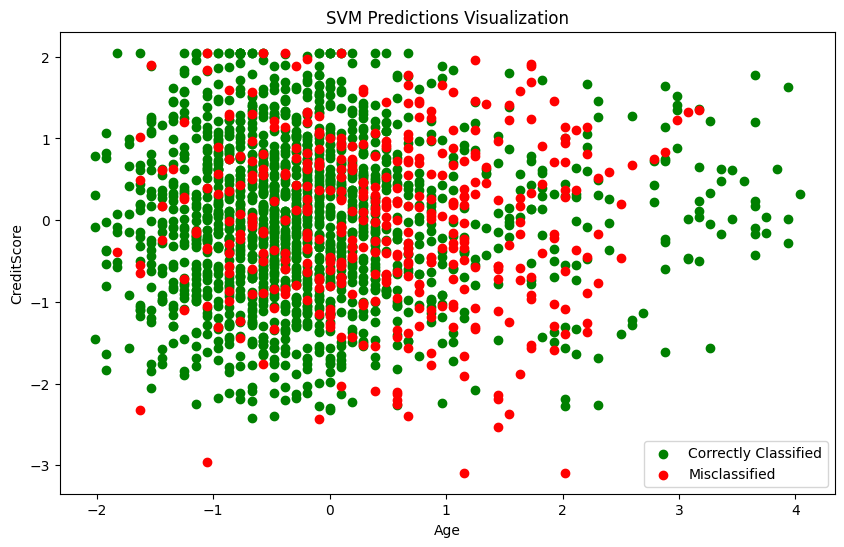

In [ ]:
# visualize using a scatter plot
# source: Module 5
test['y_test_pred'] = y_test_predictions
# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(test.loc[test['Exited'] == test['y_test_pred'], 'Age'],
            test.loc[test['Exited'] == test['y_test_pred'], 'CreditScore'],
            color='green', label='Correctly Classified')
plt.scatter(test.loc[test['Exited'] != test['y_test_pred'], 'Age'],
            test.loc[test['Exited'] != test['y_test_pred'], 'CreditScore'],
            color='red', label='Misclassified')

plt.xlabel('Age')
plt.ylabel('CreditScore')
plt.title('SVM Predictions Visualization')
plt.legend()
plt.show()

# Polynomial Kernel


In [ ]:
# now we do the same thing again for polynomial kernels
# we change the argument for the kernel parameter here to "poly"
# we use arguments (3 and 1) for the parameters (degree and C) as suggested
poly_svm_clf = SVC(kernel='poly', degree=3, C=1)

In [ ]:
# train the model
poly_svm_clf.fit(X, y)

SVC(C=1, kernel='poly')

In [ ]:
# get the predicts
y_test_predictions_poly = poly_svm_clf.predict(X_test)

In [ ]:
# check accuracy
print("Accuracy:", metrics.accuracy_score(y_test, y_test_predictions_poly))
print("Recall:", metrics.recall_score(y_test, y_test_predictions_poly, average='weighted'))

Accuracy: 0.857
Recall: 0.857
